In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv('datasets\\diabetes_symptoms.csv', na_values=['missing', 'xx', 'x', '?', '-'])
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [5]:
for col in df.drop('Age', axis=1):
    print(df[col].unique())

['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


<AxesSubplot:xlabel='Age'>

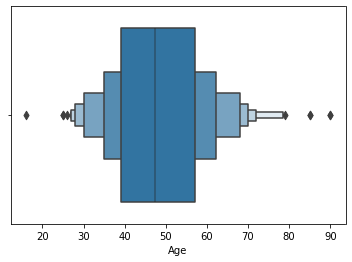

In [6]:
sns.boxenplot(data=df, x='Age')

In [7]:
df[(df['Age'] >= 78) | (df['Age'] <= 27)]['Age'] = df['Age'].median()

<ipython-input-7-07ff41feb509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['Age'] >= 78) | (df['Age'] <= 27)]['Age'] = df['Age'].median()


In [8]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [9]:
df = pd.get_dummies(df, columns=df.drop('Age', axis=1).columns, drop_first=True)
df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [10]:
df = df.rename(columns={'class_Positive': 'class'})
df

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [11]:
x = df.drop('class', axis=1)
y = df['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=32)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(390, 16)
(390,)
(130, 16)
(130,)


In [14]:
y_train.value_counts()

1    241
0    149
Name: class, dtype: int64

In [15]:
sampler = SMOTE()
x_train, y_train = sampler.fit_resample(x_train, y_train)
y_train.value_counts()

0    241
1    241
Name: class, dtype: int64

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [18]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
}

In [19]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print('-'*30)

Training Model KNN 
--------------
Training Accuracy: 0.9605809128630706
Testing Accuracy: 0.9076923076923077
Testing Confusion Matrix: 
[[49  2]
 [10 69]]
Testing Recall: 0.8734177215189873
Testing Precesion: 0.971830985915493
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.9813278008298755
Testing Accuracy: 0.9615384615384616
Testing Confusion Matrix: 
[[51  0]
 [ 5 74]]
Testing Recall: 0.9367088607594937
Testing Precesion: 1.0
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9769230769230769
Testing Confusion Matrix: 
[[49  2]
 [ 1 78]]
Testing Recall: 0.9873417721518988
Testing Precesion: 0.975
------------------------------
Training Model RF 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9923076923076923
Testing Confusion Matrix: 
[[50  1]
 [ 0 79]]
Testing Recall: 1.0
Testing Precesion: 0.9875
------------------------------
Training Model XGB 
--------------
[15:17:31] WA

C:\Users\moham\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [22]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')

Training Accuracy: 1.0
Testing Accuracy: 0.9923076923076923
Testing Confusion Matrix: 
[[50  1]
 [ 0 79]]
Testing Recall: 1.0
Testing Precesion: 0.9875


In [21]:
for pair in zip(y_pred, y_test):
    print(pair)

(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(0, 0)
(1, 1)
(0, 0)


In [23]:
joblib.dump(model, 'symptoms_model.h5')
joblib.dump(scaler, 'symptoms_scaler.h5')

['symptoms_scaler.h5']